# One-class LWR

In [1]:
import numpy as np
import pandas as pd

In [2]:
npzfile = np.load('./exact_jacob/data_inputs.npz')
T = npzfile['T']
L = npzfile['L']
u_max = npzfile['u_max']
rho_jam = npzfile['rho_jam']
rho_a = npzfile['rho_a']
rho_b = npzfile['rho_b']
gama = npzfile['gama']
CFL = npzfile['CFL']
EPS = npzfile['EPS']
nb_grid = npzfile['nb_grid']
Nx0 = npzfile['Nx0']
Nt0 = npzfile['Nt0']
multip = npzfile['multip']
use_precond = npzfile['use_precond']
use_multigrid = npzfile['use_multigrid']
print("Data inputs : ")
print("T=",T, "; L=",L, "; u_max=",u_max, "; rho_jam=",rho_jam, "; rho_a=",rho_a, "; rho_b=",rho_b, "; gama=",gama, 
      "; CFL=",CFL, "; EPS=",EPS, "; nb_grid=",nb_grid, "; Nx0=",Nx0, "; Nt0=",Nt0, "; multip=",multip, 
         "; use_precond=",use_precond, "; use_multigrid=",use_multigrid)
nb_grid=5

Data inputs : 
T= 1.0 ; L= 1 ; u_max= 1 ; rho_jam= 1.0 ; rho_a= 0.05 ; rho_b= 0.95 ; gama= 0.1 ; CFL= 0.75 ; EPS= 0.45 ; nb_grid= 8 ; Nx0= 15 ; Nt0= 60 ; multip= 2 ; use_precond= True ; use_multigrid= True


In [3]:
def rmse(actual, pred): # the square root of the mean squared error
    # MSE = (1/n) * Σ{(actual – prediction)**2}
    # RMSE = sqrt(MSE)
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.square(np.subtract(actual,pred)).mean())
Nx_list = []; Nt_list = []; dt_list = []; dx_list = []; mu_list = []; rmse_error = []
for i in range(nb_grid):
    npzfile = np.load('./exact_jacob/data_solutions_grid{}.npz'.format(i))
    Nx = npzfile['Nx']
    Nx_list.append(Nx)
    Nt = npzfile['Nt']
    Nt_list.append(Nt)
    dt = round(np.float64(npzfile['dt']),4)
    dt_list.append(dt)
    dx = round(np.float64(npzfile['dx']),4)
    dx_list.append(dx)
    mu = npzfile['mu']
    mu_list.append(mu)
    guess = npzfile['guess']
    sol = npzfile['solution']
    rmse_error.append(rmse(sol,guess))
    
items = {'Nx' : pd.Series(data = Nx_list), 'Nt' : pd.Series(data = Nt_list), 'dt' : pd.Series(data = dt_list), 
        'dx' : pd.Series(data = dx_list), 'mu' : pd.Series(data = mu_list),
        'RMSE error' : pd.Series(data = rmse_error)}
print(pd.DataFrame(items))

    Nx   Nt      dt      dx   mu  RMSE error
0   15   60  0.0167  0.0667  0.0    0.450961
1   30  120  0.0083  0.0333  0.0    0.038900
2   60  240  0.0042  0.0167  0.0    0.041081
3  120  480  0.0021  0.0083  0.0    0.034379
4  240  960  0.0010  0.0042  0.0    0.025649


In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm

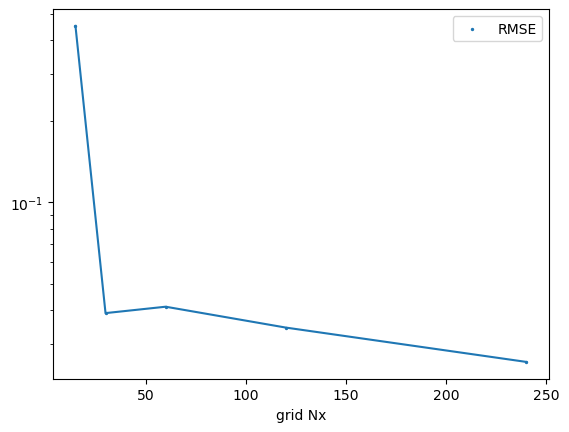

<Figure size 640x480 with 0 Axes>

In [5]:
fig, ax = plt.subplots()
plt.yscale('log')
ax.scatter(Nx_list, rmse_error, s=2, label="RMSE")
plt.plot(Nx_list, rmse_error)
ax.set_xlabel("grid Nx")
# plt.title("rmse")
plt.legend()
# plt.legend(bbox_to_anchor =(0.7, 0.7))
plt.show()
fig.savefig("./plots/rmse.pdf")
plt.clf()

In [6]:
#npzfile = np.load('./datas/data_solutions_grid5.npz')
s_rho = npzfile['s_density']
s_u = npzfile['s_velocity']
s_V = npzfile['s_optimal_cost']
t_points = npzfile['t_points']
x_points = npzfile['x_points']

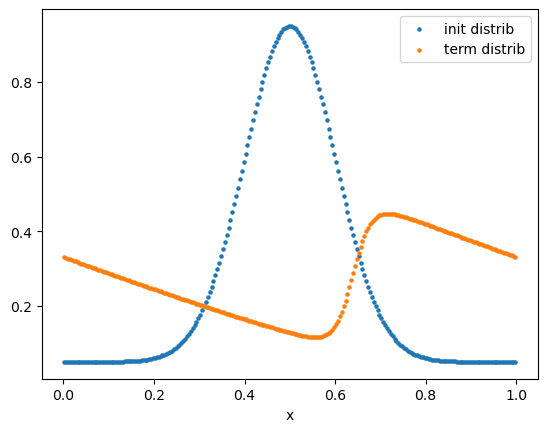

<Figure size 640x480 with 0 Axes>

In [7]:
# INIT & TERM DISTRIB  
nu_X0 = s_rho[:,0]
nu_XT = s_rho[:,-1]
c_points = x_points[:-1] + np.diff(x_points)/2
fig, ax = plt.subplots()
ax.margins(0.05)
ax.scatter(c_points, nu_X0, s=5, label="init distrib")
ax.scatter(c_points, nu_XT, s=5, label="term distrib")
ax.set_xlabel("x")
# plt.title("initial distrib")
plt.legend()
plt.show()
fig.savefig("./plots/fig_init_term_distrib.pdf")
plt.clf()

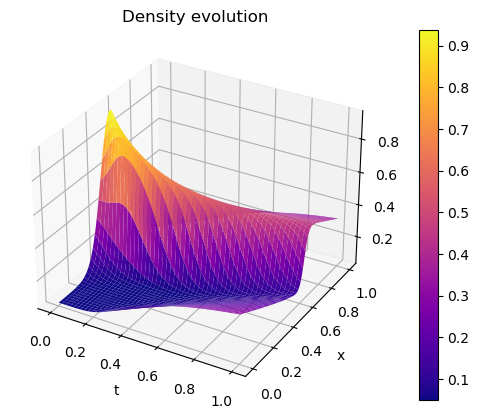

<Figure size 640x480 with 0 Axes>

In [8]:
# density SURFACE
x_min = x_points[0]
x_max = x_points[-1]
t_surf, x_surf = np.meshgrid(t_points, c_points)
# print(np.shape(t_surf),np.shape(x_surf),np.shape(s_rho))
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
plot = ax.plot_surface(t_surf, x_surf, s_rho, cmap=cm.plasma)
fig.colorbar(plot,fraction=0.05, pad=0.08)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.title("Density evolution")
plt.show()
fig.savefig("./plots/fig_density_surface.pdf")
plt.clf()

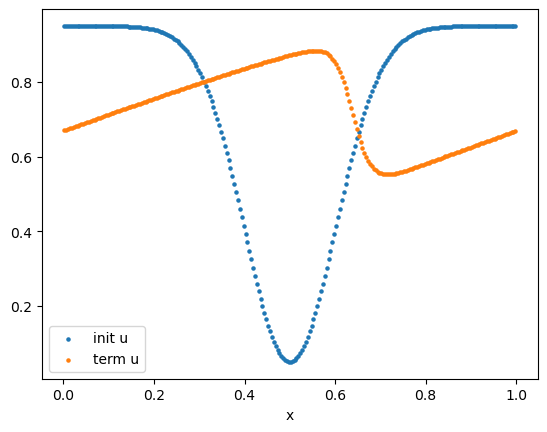

<Figure size 640x480 with 0 Axes>

In [9]:
# INIT & TERM u  
nu_u0 = s_u[:,0]
nu_uT = s_u[:,-1]
fig, ax = plt.subplots()
ax.margins(0.05)
ax.scatter(c_points, nu_u0, s=5, label="init u")
ax.scatter(c_points, nu_uT, s=5, label="term u")
ax.set_xlabel("x")
# plt.title("initial distrib")
plt.legend()
plt.show()
fig.savefig("./plots/fig_init_term_velocity.pdf")
plt.clf()

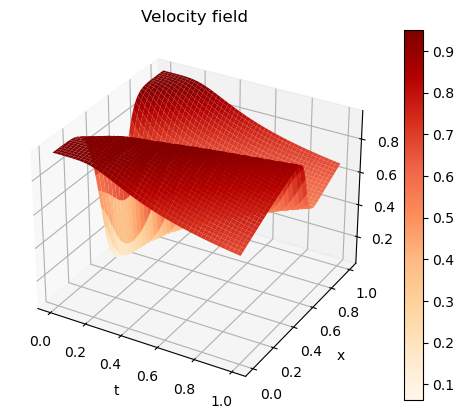

<Figure size 640x480 with 0 Axes>

In [10]:
# u SURFACE
t_surf, x_surf = np.meshgrid(t_points[:-1], c_points)
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
plot = ax.plot_surface(t_surf, x_surf, s_u, cmap=cm.OrRd)
fig.colorbar(plot)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.title("Velocity field")
plt.show()
fig.savefig("./plots/fig_velocity_surface.pdf")
plt.clf()

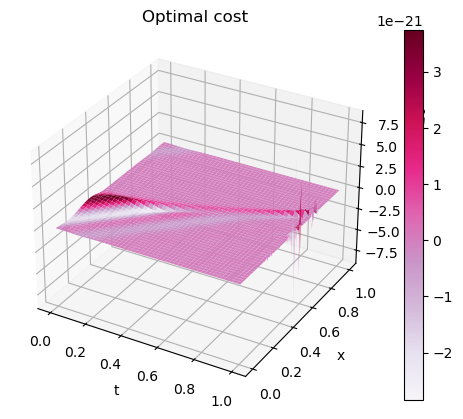

<Figure size 640x480 with 0 Axes>

In [11]:
# Cost SURFACE
t_surf, x_surf = np.meshgrid(t_points, x_points[1:])
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
plot = ax.plot_surface(t_surf, x_surf, s_V, cmap=cm.PuRd)
fig.colorbar(plot)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.title("Optimal cost")
plt.show()
fig.savefig("./plots/fig_optimal_cost_surface.pdf")
plt.clf()

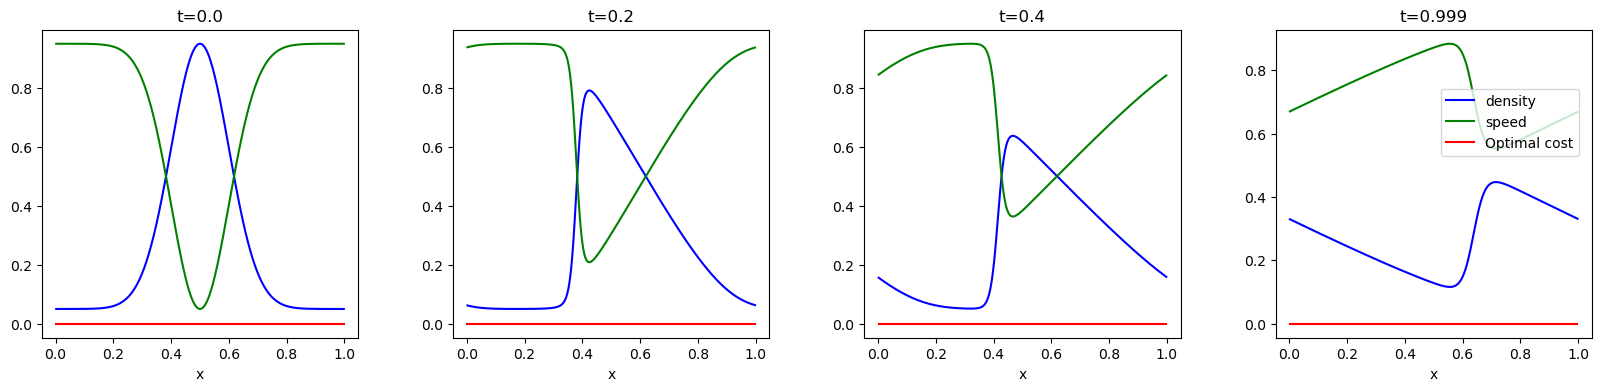

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(20, 4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
plt.subplot(1,4,1)
plt.plot(c_points,s_rho[:,0],'b',label='density')
plt.plot(c_points,s_u[:,0],'g',label='speed')
plt.plot(c_points,s_V[:,0],'r',label='Optimal cost')
#     plt.grid()
plt.title("t=0.0")
plt.xlabel('x')

plt.subplot(1,4,2)
plt.plot(c_points,s_rho[:,int(Nt/5)],'b',label='density')
plt.plot(c_points,s_u[:,int(Nt/5)],'g',label='speed')
plt.plot(c_points,s_V[:,int(Nt/5)],'r',label='Optimal cost')
#     plt.grid()
plt.title("t={t}".format(t=round(t_points[int(Nt/5)],3)))
plt.xlabel('x')

plt.subplot(1,4,3)
plt.plot(c_points,s_rho[:,int(2*Nt/5)],'b',label='density')
plt.plot(c_points,s_u[:,int(2*Nt/5)],'g',label='speed')
plt.plot(c_points,s_V[:,int(2*Nt/5)],'r',label='Optimal cost')
#     plt.grid()
#     plt.legend(loc='center left')
plt.title("t={t}".format(t=round(t_points[int(2*Nt/5)],3)))
plt.xlabel('x')

plt.subplot(1,4,4)
plt.plot(c_points,s_rho[:,Nt-1],'b',label='density')
plt.plot(c_points,s_u[:,Nt-1],'g',label='speed')
plt.plot(c_points,s_V[:,Nt-1],'r',label='Optimal cost')
#     plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.7))
plt.title("t={t}".format(t=round(t_points[Nt-1],3)))
plt.xlabel('x')
plt.show()
fig.savefig("./plots/fig_density_velocity_optimal_cost.pdf")
plt.clf()